In [16]:
%matplotlib inline

# PyCCD  


> ### Import the Datacube Configuration

In [1]:
import datacube
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf')

>### Browse the available Data Cubes on the storage platform    
> You might want to learn more about what data is stored and how it is stored.


In [2]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']
netCDF_products

,name,description,platform,product_type,lon,lat,time,instrument,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
11,alos2_palsar_vietnam,ALOS2 PALSAR tile in DN format processed for t...,ALOS_2,gamma0,None,None,None,PALSAR,NetCDF,EPSG:4326,"[-0.000222222222222, 0.000222222222222]","[0.666666666666, 0.666666666666]","(latitude, longitude)"
12,alos_palsar_vietnam,ALOS PALSAR tile in DN format processed for th...,ALOS,gamma0,None,None,None,PALSAR,NetCDF,EPSG:4326,"[-0.000222222222222, 0.000222222222222]","[0.666666666666, 0.666666666666]","(latitude, longitude)"
14,gpm_imerg_gis_daily_global,Global NetCDF GPM IMERG GIS data,GPM,daily,None,None,None,GPM,NetCDF,EPSG:4326,"[-0.1, 0.1]","[90, 180]","(latitude, longitude)"
15,gpm_imerg_gis_monthly_global,Global NetCDF GPM IMERG GIS data,GPM,monthly,None,None,None,GPM,NetCDF,EPSG:4326,"[-0.1, 0.1]","[90, 180]","(latitude, longitude)"
17,ls5_ledaps_bangladesh,Landsat 5 USGS Collection 1 Higher Level SR sc...,LANDSAT_5,LEDAPS,None,None,None,TM,NetCDF,EPSG:4326,"[-0.000270861, 0.000294834]","[0.812583, 0.884502]","(latitude, longitude)"
18,ls5_ledaps_lake_chad_full,Landsat 5 USGS Collection 1 Higher Level SR sc...,LANDSAT_5,LEDAPS,None,None,None,TM,NetCDF,EPSG:4326,"[-0.000271152, 0.00027769]","[0.813456, 0.83307]","(latitude, longitude)"
19,ls7_ledaps_amazon_river,Landsat 7 USGS Collection 1 Higher Level SR sc...,LANDSAT_7,LEDAPS,None,None,None,ETM,NetCDF,EPSG:4326,"[-0.000271302, 0.000269995]","[0.813906, 0.809985]","(latitude, longitude)"
20,ls7_ledaps_bangladesh,Landsat 7 USGS Collection 1 Higher Level SR sc...,LANDSAT_7,LEDAPS,None,None,None,ETM,NetCDF,EPSG:4326,"[-0.000270861, 0.000294834]","[0.812583, 0.884502]","(latitude, longitude)"
35,ls7_ledaps_bangladesh_bari,Landsat 7 USGS Collection 1 Higher Level SR sc...,LANDSAT_7,LEDAPS,None,None,None,ETM,NetCDF,EPSG:4326,"[-0.000270861, 0.000294834]","[0.812583, 0.884502]","(latitude, longitude)"


>### Pick a product  
>Use the platform names from the previous block to select a small Data Cube. The data_access_api utility will give you lat, lon, and time bounds of your Data Cube.   

In [3]:
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi(config = '/home/localuser/.datacube.conf')

platform = "LANDSAT_7"

product = "ls7_ledaps_bangladesh"
product = "ls7_ledaps_colombia"  

# Get Coordinates
coordinates = api.get_full_dataset_extent(platform = platform, product = product)

> #### Display Lat-Lon and Time Bounds

In [4]:
latitude_extents = (min(coordinates['latitude'].values),max(coordinates['latitude'].values))
print( latitude_extents )

(-0.94618316250000012, 2.4022878314999998)


In [5]:
longitude_extents = (min(coordinates['longitude'].values),max(coordinates['longitude'].values))
print( longitude_extents )

(-76.517724847500006, -74.045824987500012)


In [6]:
time_extents = (min(coordinates['time'].values),max(coordinates['time'].values))
print( time_extents )

(numpy.datetime64('2000-01-03T15:06:45.000000000'), numpy.datetime64('2015-12-14T15:15:06.000000000'))


# Visualize Data Cube Region

In [7]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

> #### Picking a smaller analysis region

In [8]:
######### Bangladesh ############################
# longitude_extents = (90.031428,  90.040565) 
# latitude_extents  = ( 25.225266, 25.232605)

######### Colombia - Cartegena ##################
longitude_extents = ( -74.8567, -74.8318 )
latitude_extents = (1.326481586145379,  1.3424)

######## Ghana ##################
#longitude_extents = (  -2.2622,  -2.2039)
#latitude_extents = (8.2390, 8.2867) 

#latitude_extents = (8.2631, 8.2834)
#longitude_extents = (-2.2486, -2.2229)

# longitude_extents = (-2.4026, -2.3484)
# latitude_extents = ( 8.1386,  8.1872)

# ######### Vietnam - Buan Tau Sanh Lake ################## 
# longitude_extents = (108.02, 108.15)
# latitude_extents  = (12.18 , 12.30)

time_extents = ('2000-01-01', '2016-01-01')

In [9]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Loading the Data
> The following snippet loads in Landsat Imagery for the extents we've just defined. Furthermore we specify a preference to load data from `red`, `green`, `blue`, `nir`, `swir1`, `swir2`, and `pixel_qa` bands.  

In [10]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          platform = platform,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

> ### Examining the size of our extent.  
> The compute time of pyCCD scales sharply with extent sizes. Seemingly small areas can take anywhere from 10-15 minutes to process. The current solution

In [11]:
landsat_dataset
#view the dimensions and sample content from the cube

<xarray.Dataset>
Dimensions:    (latitude: 59, longitude: 94, time: 152)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-20T15:06:11 2000-04-08T15:05:56 ...
  * latitude   (latitude) float64 1.342 1.342 1.342 1.341 1.341 1.341 1.341 ...
  * longitude  (longitude) float64 -74.86 -74.86 -74.86 -74.86 -74.86 -74.86 ...
Data variables:
    red        (time, latitude, longitude) int16 803 841 822 974 1127 1013 ...
    green      (time, latitude, longitude) int16 810 810 832 917 982 961 855 ...
    blue       (time, latitude, longitude) int16 643 665 685 705 705 686 646 ...
    nir        (time, latitude, longitude) int16 2437 2437 2638 2879 2959 ...
    swir1      (time, latitude, longitude) int16 2387 2578 2838 3027 3547 ...
    swir2      (time, latitude, longitude) int16 1152 1326 1475 1624 1973 ...
    pixel_qa   (time, latitude, longitude) int32 66 66 66 66 66 66 66 66 66 ...
Attributes:
    crs:      EPSG:4326

# PyCCD

>### Import Library  
The library exposes three functions: `process_xarray`, `process_pixel`, `plot_pixel`  

In [12]:
import utils.data_cube_utilities.dc_ccd as ccd

> ### Timed Calculation of change volume  


In [13]:
from time import time  

t1 = time() 
ccd_product = ccd.process_xarray(landsat_dataset, distributed = True) #Run process xarray on large dataset
t2 = time()

print(t2 - t1)

615.8723814487457


> ## Plotting change volume  
> Plot change volume to identify regions/areas of change

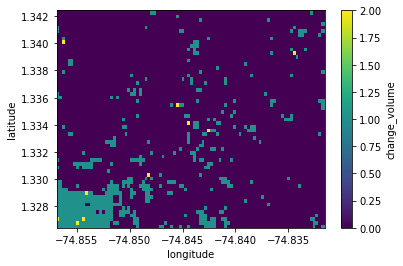

In [17]:
ccd_product.plot()

In [15]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

# Validating Change Volume  

In [33]:
import numpy as np  
import matplotlib.pyplot as plt

## Used to plot rgb composites of xarray. Simply pass in a dataset, adjust the 'at_index' parameter 
def rgb(dataset, at_index = 0, bands = ['red', 'green', 'blue'], paint_on_mask = []):

    rgb = np.stack([dataset[bands[0]], dataset[bands[1]], dataset[bands[2]]], axis = -1)
    max_possible = 3500
    rgb = rgb.astype(np.float32)
    rgb[rgb<0] = 0
    rgb[rgb > max_possible] = max_possible
    rgb *= 255.0/rgb.max()

    rgb = rgb.astype(int)
    rgb = rgb.astype(np.float32)
    rgb = 255-rgb
    
    rgb[rgb > 254] = 254
    rgb[rgb < 1]   = 1
    
    
    for mask, color in paint_on_mask:        
        rgb[mask] = np.array([256,256,256]) - np.array(color).astype(np.int16)
    
    if 'time' in dataset:
        plt.imshow((rgb[at_index]))
    else:
        plt.imshow(rgb)  

> ### Imagery from earlier acquisitions  
> Change starts with landcover before...    

2000-04-08T15:05:56.000000000


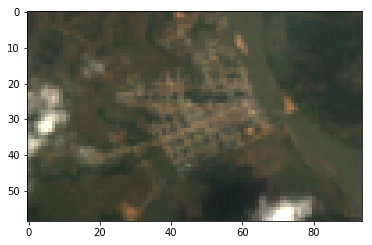

In [34]:
print( landsat_dataset.time.values[1] )
rgb(landsat_dataset, at_index = 0)

> ### Imagery from later acquisitions  
> ... and is revealed when compared to landcover after.  

2012-12-21T15:09:40.000000000


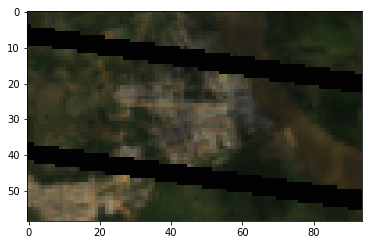

In [35]:
print( landsat_dataset.time.values[130] )
rgb(landsat_dataset, at_index = 130)

># Change on a per-pixel level  

In [28]:
## Bangladesh 
pixel_latitude = 25.228928
pixel_longitude  = 90.035790

## Colombia  
pixel_latitude = 1.3282
pixel_longitude  = -74.8549  

In [29]:
target_pixel = landsat_dataset.sel(latitude = pixel_latitude, longitude = pixel_longitude, method = "nearest")

In [30]:
processed_pixel = ccd.process_pixel(target_pixel)

In [31]:
processed_pixel.attrs['ccd_break_times']


[datetime.datetime(2008, 9, 5, 0, 0), datetime.datetime(2013, 4, 28, 0, 0)]

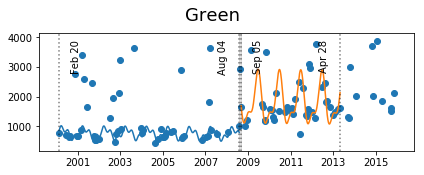

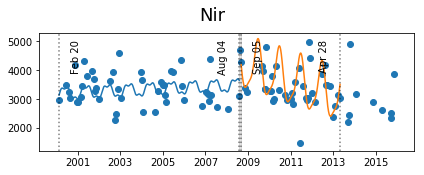

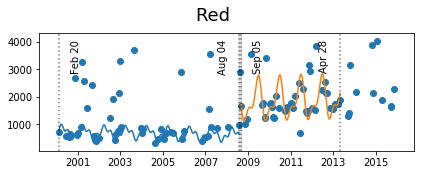

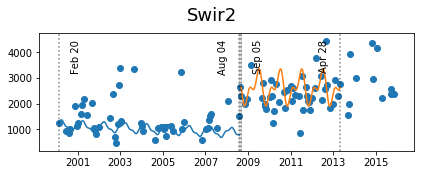

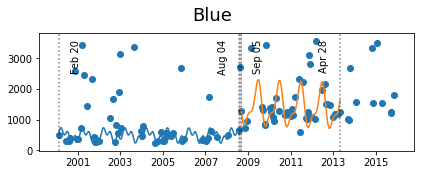

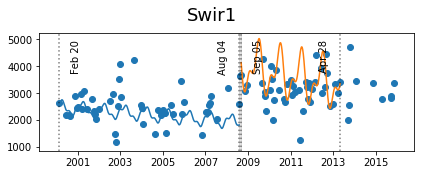

In [32]:
ccd.plot_pixel(processed_pixel)
